### Modelo de Recomendacion para restaurante.
### en el siguiente ejercicio se realiza el procedimiento para obtener una lista de restaurantes recomendados con el metodo:
## Filtrado colaborativo de productos (Item-based Collaborative Filtering)
### este metodo se basa en filtrar por una similitud entre los restaurantes(Items)

### Dataset Reference:
#### Nombre: Restaurant & consumer data, recommender systems domain
#### Abstract:
#### Link:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Lectura de los datos

In [50]:
ratings = pd.read_csv('rating_final.csv')

## Exploracion de los datos

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
userID            1161 non-null object
placeID           1161 non-null int64
rating            1161 non-null int64
food_rating       1161 non-null int64
service_rating    1161 non-null int64
dtypes: int64(4), object(1)
memory usage: 45.4+ KB


In [53]:
ratings.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [60]:
restaurantes = pd.read_excel('restaurantes.xlsx')

#### unimos las tablas en un data frame mediante la funcion merge de pandas

In [6]:
df = pd.merge(ratings,restaurantes, on='placeID')

In [7]:
df.head()

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1108,135085,1,2,1,Tortas Locas Hipocampo
2,U1081,135085,1,2,1,Tortas Locas Hipocampo
3,U1056,135085,2,2,2,Tortas Locas Hipocampo
4,U1134,135085,2,1,2,Tortas Locas Hipocampo


### realizamos un agrupamiento por el nombre del restarante devolviendo la media del ratign

In [8]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Michiko Restaurant Japones    2.000000
emilianos                     2.000000
Restaurant Las Mananitas      2.000000
cafe punta del cielo          1.833333
La Estrella de Dimas          1.800000
Name: rating, dtype: float64

In [51]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
puesto de tacos         1
la Cantina              1
Pizzeria Julios         1
Mariscos El Pescador    1
Luna Cafe               1
Name: rating, dtype: int64

### Se crea el dataframe con los restaurantes agrupados por su nombre con el valor rating medio

In [10]:
valoraciones = pd.DataFrame(df.groupby('name')['rating'].mean())

In [52]:
valoraciones.head()

,rating,cantidad de rating
name,,
Abondance Restaurante Bar,0.500000,12
Arrachela Grill,1.000000,3
Cabana Huasteca,1.461538,13
Cafe Chaires,1.000000,15
Cafeteria cenidet,1.000000,6


### Se adiciona una columna con la cantidad de rating por restaurant

In [12]:
valoraciones['cantidad de rating'] = pd.DataFrame(df.groupby('name')['rating'].count())

In [13]:
valoraciones.head()

,rating,cantidad de rating
name,,
Abondance Restaurante Bar,0.500000,12
Arrachela Grill,1.000000,3
Cabana Huasteca,1.461538,13
Cafe Chaires,1.000000,15
Cafeteria cenidet,1.000000,6


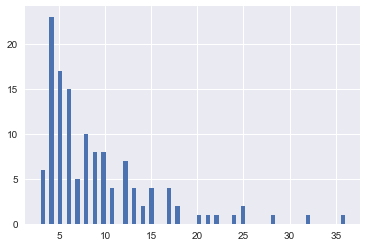

In [14]:
valoraciones['cantidad de rating'].hist(bins=70)

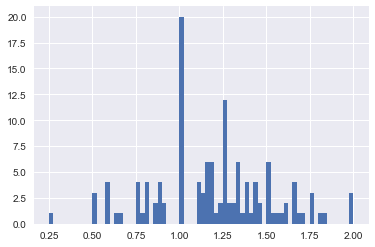

In [15]:
valoraciones['rating'].hist(bins=70)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


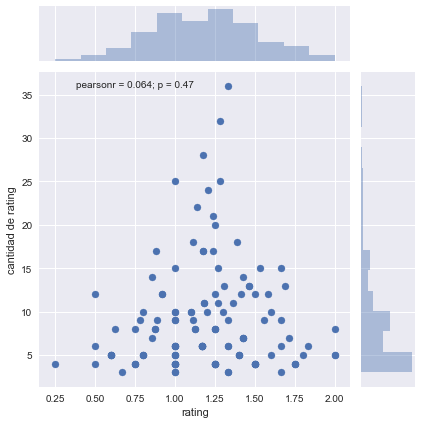

In [35]:
sns.jointplot(x='rating', y='cantidad de rating',data=valoraciones)

#### Como vamos a crear recomendaciones por similitud pivoteamos el df y creamos una matriz que tiene por cada fila un usuario y en las CELDAS tiene la valoracion que le dio a los restaurante si es que los valoro

In [17]:
restaurante_matrix = df.pivot_table(index='userID',columns='name', values='rating')

In [36]:
restaurante_matrix.head()

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El Rinc√≥n de Tlaquepaque,...,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,
U1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1003,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U1004,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
U1005,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ordenamos las valoraciones por la cantidad de rating

In [37]:
valoraciones.sort_values(by='cantidad de rating', ascending=False).head(10)

,rating,cantidad de rating
name,,
Tortas Locas Hipocampo,1.333333,36
puesto de tacos,1.281250,32
Cafeteria y Restaurant El Pacifico,1.178571,28
La Cantina Restaurante,1.280000,25
Gorditas Doa Gloria,1.000000,25
Restaurant la Chalita,1.208333,24
Restaurante Marisco Sam,1.136364,22
Restaurante El Cielo Potosino,1.238095,21
Restaurant Oriental Express,1.250000,20


#### creamos la variable con filtrada con los datos de la columna 'Tortas Locas Hipocampo' para posteriormente ver los retaurantes parecidos a este

In [20]:
tortas_user_rating = restaurante_matrix['Tortas Locas Hipocampo']

In [38]:
tortas_user_rating.head()

userID
U1001    0.0
U1002    1.0
U1003    NaN
U1004    NaN
U1005    NaN
Name: Tortas Locas Hipocampo, dtype: float64

### creamos la lista de la correlacion que existe entre ["tortas_user_rating"] y todos los restaurantes es decir todas las columnas de la matriz pivoteada previamente

In [39]:
restaurantes_similares = restaurante_matrix.corrwith(tortas_user_rating)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


### creamos el data frame con los restaurantes correlados es decir con la similitud y mostramos en orden descendiente los 10 primero los de mayor correlacion o que mas se parecen por su rating

In [29]:
df= pd.DataFrame(restaurantes_similares)
restaurantes_similares.dropna().sort_values(ascending=False).head(10)

name
rockabilly                               1.000000
Tortas Locas Hipocampo                   1.000000
el pueblito                              1.000000
Restaurante Guerra                       1.000000
cafe punta del cielo                     1.000000
Restaurante Pueblo Bonito                1.000000
La Fontana Pizza Restaurante and Cafe    1.000000
Cabana Huasteca                          0.930261
Restaurante la Gran Via                  0.912871
Restaurante El Cielo Potosino            0.898933
dtype: float64

#### para asegurarnos que la los restauranes hayan tenido mas de 10 valoracion para este data set el numero puede cambiar

In [40]:
restaurante_popular = valoraciones['cantidad de rating'] > valoraciones['cantidad de rating'].mean()

In [41]:
valoraciones[restaurante_popular].sort_values(['rating'],ascending=False).head(10)


,rating,cantidad de rating
name,,
Mariscos El Pescador,1.692308,13
El Rincon de San Francisco,1.666667,15
Mariscos Tia Licha,1.600000,10
Preambulo Wifi Zone Cafe,1.583333,12
La Virreina,1.533333,15
Restaurante Guerra,1.500000,12
Restaurante la Gran Via,1.461538,13
Cabana Huasteca,1.461538,13
Restaurante Versalles,1.428571,14


#### Podemos ver todas aquellarestaurantes que tienen más de 10 valoraciones de distintos usuarios, ordenadas por su puntuación media. Si ahora hacemos un “join” con la tabla de votos original, nos quedaremos solo con esta restaurantes, descartando aquellas que solo votaron unos pocos usuarios

In [31]:
df = valoraciones[restaurante_popular].join(pd.DataFrame(restaurantes_similares, columns=['similaridad']))

In [48]:
df.sort_values(['similaridad'],ascending=False).head(10)

,rating,cantidad de rating,similaridad
name,,,
Tortas Locas Hipocampo,1.333333,36,1.000000
Restaurante Pueblo Bonito,1.307692,13,1.000000
Restaurante Guerra,1.500000,12,1.000000
Cabana Huasteca,1.461538,13,0.930261
Restaurante la Gran Via,1.461538,13,0.912871
Restaurante El Cielo Potosino,1.238095,21,0.898933
La Virreina,1.533333,15,0.892218
Restaurant Oriental Express,1.250000,20,0.881409
Restaurante El Reyecito,1.272727,11,0.867722
